Please make sure that the version of pandas is 1.2.4

In [ ]:
!pip uninstall pandas
!pip install pandas==1.2.4

In [2]:
import pandas as pd
pd.__version__

'1.2.4'

In [3]:
# if you use colab :
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
!pip install pyLDAvis

In [5]:
!pip install umap

In [6]:
!pip install stop_words

In [7]:
!pip install language_detector

In [8]:
!pip install symspellpy

In [9]:
!pip install sentence_transformers

In [ ]:
# %% import libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import re

import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import pyLDAvis
import pyLDAvis.sklearn

from collections import Counter
import itertools
from wordcloud import WordCloud, STOPWORDS

from tqdm import tqdm

import gensim
from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models.coherencemodel import CoherenceModel

import keras
from keras.layers import Input, Dense
from keras.models import Model

import time
from mpl_toolkits.mplot3d import Axes3D
import umap

from stop_words import get_stop_words
from language_detector import detect_language
import pkg_resources
from symspellpy import SymSpell, Verbosity

import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=Warning)

from datetime import datetime
import pickle

from sentence_transformers import SentenceTransformer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
sns.set_style('whitegrid')



In [11]:
import csv


def decode_utf8(s):
    if s: return eval(s).decode('utf-8')
    else: return s

def decode_strlist_utf8(lst):
    return [s.decode('utf-8') for s in eval(lst)]

def dataframe_from_file(filename):
    with open(filename, 'r', errors="ignore") as f:
        df = pd.read_csv(f, error_bad_lines=False, converters={
            'text': decode_utf8,
            'country': decode_utf8,
            'user_screen_name': decode_utf8,
            'hashtags': decode_strlist_utf8,
            'mentions': decode_strlist_utf8
        })
    return df

def dataframe_from_mult_files(filenames):
    """@param filenames (List[Str]): list of filenames"""
    
    dfs = []
    for filename in filenames:
        dfs.append(dataframe_from_file(filename))
    return pd.concat(dfs, axis=0)

In [12]:
# %%
def cleanTxt(text):
    """
    Function to clean str text
    
    Parameters
    ----------
    text : str
        text before cleaning.
    Returns
    -------
    text : str
        text after cleaning.
    """
    # regular expressions to recognize 'USA' (to prevent the confusion of us and US)
    text = re.sub(r'@US+([^a-z]|$)','usa ',text)
    text = re.sub(r'@us+([^a-z]|$)','usa ',text)
    text = re.sub(r'@Us+([^a-z]|$)','usa ',text)
    text = re.sub(r'@uS+([^a-z]|$)','usa ',text)
    text = re.sub(r'#US+([^a-z]|$)','usa ',text)
    text = re.sub(r'#us+([^a-z]|$)','usa ',text)
    text = re.sub(r'#Us+([^a-z]|$)','usa ',text)
    text = re.sub(r'#uS+([^a-z]|$)','usa ',text)
    text = re.sub(r'#U.S.A+([^a-z]|$)','usa ',text)
    text = re.sub(r'#U.S+([^a-z]|$)','usa ',text)
    text = re.sub(r'#u.s+([^a-z]|$)','usa ',text)
    text = re.sub(r'#u.S+([^a-z]|$)','usa ',text)
    text = re.sub(r'#U.s+([^a-z]|$)','usa ',text)
    text = re.sub(r'US+([^a-z]|$)','usa ',text)
    text = re.sub(r'U.S+([^a-z]|$)','usa ',text)
    text = re.sub(r'U.s+([^a-z]|$)','usa ',text)
    text = re.sub(r'u.s+([^a-z]|$)','usa ',text)
    text = re.sub(r'u.S+([^a-z]|$)','usa ',text)
    
    text = text.lower() # Convert to lowercase
    text = re.sub(r'@','',text) # Remove @ without the word 
    text = re.sub(r'&.+;','',text) #remove html special entities (&amp; ...)
    text = re.sub(r'\n',' ',text) # Remove \n (newline)
    text = re.sub(r'\t',' ',text) # Remove \t (newtab)
    text = re.sub(r'#','',text) # Remove the # symbol
    text = re.sub(r'RT[\s]+','',text) # Remove RT (retweet)
    text = re.sub(r'http?:\/\/\S+','',text) # Remove the hyper link
    text = re.sub(r'https?:\/\/\S+','',text)
    text = re.sub(' +', ' ', text) # remove multiple whitespace from text 
    text = re.sub(r'travel+([^a-z]|$)',' ',text) # Remove 'travel' the principal keyword in our data only
    text = re.sub('(?:\s)travel[^, ]*', '', text)
    text = re.sub(r'travelling','traveling',text) # travelling -> traveling
    text = re.sub(r'coronavirus','covid',text) # coronavirus -> covid
    text = re.sub(r'corona virus','covid',text) # coronavirus -> covid
    text = re.sub(r'covid 19','covid',text) 
    text = re.sub(r'covid-19','covid',text) 
    text = re.sub(r'covid_19','covid',text) 
    text = re.sub(r'covid19','covid',text) 
    text = re.sub(r'-',' ',text) # Remove @ without the word
    text = re.sub(r'_',' ',text) # Remove @ without the word
    text = re.sub(' +', ' ', text) # remove multiple whitespace from text
    return text



def cleanData(df, col):
    """
    Function to clean df : pandas.core.frame.DataFrame
    
    Parameters
    ----------
    df : pandas.core.frame.DataFrame
        data before cleaning.
    col : str
        column where tweets are stored.
    Returns
    -------
    df : pandas.core.frame.DataFrame
        data after cleaning.
    """
    
    
    
    df[col] = df[col].map(lambda x: re.sub('[,\.!?"]', '', x)) # Remove punctuation
    #df[col]= df[col].map(lambda x: x.lower()) # Convert to lowercase
    
    # apply clenTxt defined before on the data
    df[col] = df[col].apply(cleanTxt)
    
    # remove emojis
    df[col] = df[col].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
    
    
    # Note : We don't drop NaN and Empty rows to conserve the original IDs of tweets
    # the commented code below drops NaN rows
    """
    # Drop NaN
    #nan_value = float("NaN")
    #df.replace("", nan_value, inplace=True)
    #df.dropna(subset = [col], inplace=True)
    #df = df.reset_index(drop=True)
    """
    
    return df
    


def wordcloud_data(df, col, save):
    """
    Shows the wordcloud of the data
    
    Parameters
    ----------
    df : pandas.core.frame.DataFrame
        data.
    col : str
        column where tweets are stored.
    Returns
    -------
    None.
    """
    
    # Join the different processed titles together.
    long_string = ','.join(list(df[col].values))
    # Create a WordCloud object
    wordcloud = WordCloud(background_color="white", max_words=10000, contour_width=10, contour_color='steelblue')
    # Generate a word cloud
    wordcloud.generate(long_string)
    #wordcloud.to_image()
    plt.figure( figsize=(50,20), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    if save:
        wordcloud.to_file("/content/gdrive/MyDrive/results/wordcloud.png")

def wordBarGraphFunction(df,column,save):
    """
    Parameters
    ----------
    df : pandas.core.frame.DataFrame
        data (preferd cleaned one).
    col : str
        column where tweets are stored.
    Returns
    -------
    None.
    """
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in STOPWORDS]
    plt.barh(range(20), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:20])])
    plt.yticks([x + 1 for x in range(20)], reversed(popular_words_nonstop[0:20]))
    plt.title("Most common words")
    if save:
        plt.savefig("/content/gdrive/MyDrive/results/Most common words.png")
    plt.show()
    



def lemmatize(text):
    """
    Stemmers remove morphological affixes from words, leaving only the word stem.
    <Lemmatization is similar to stemming but it brings context to the words>
    <Lemmatization gives interesting results but still very slow to use>
    <we don't use this function in our implementation of models!!>
    # https://www.geeksforgeeks.org/python-lemmatization-approaches-with-examples/
    Parameters
    ----------
    text : str
    Returns
    -------
    str
        text after lemmatizing.
    """
      
    wnl = WordNetLemmatizer()
    stemmer = PorterStemmer()
    wnl = WordNetLemmatizer()
      
    # Define function to lemmatize each word with its POS tag 
      
    # POS_TAGGER_FUNCTION : TYPE 1 
    def pos_tagger(nltk_tag): 
        if nltk_tag.startswith('J'): 
            return wordnet.ADJ 
        elif nltk_tag.startswith('V'): 
            return wordnet.VERB 
        elif nltk_tag.startswith('N'): 
            return wordnet.NOUN 
        elif nltk_tag.startswith('R'): 
            return wordnet.ADV 
        else:           
            return None
            
    # tokenize the sentence and find the POS tag for each token 
    pos_tagged = nltk.pos_tag(nltk.word_tokenize(text))   
    # we use our own pos_tagger function to make things simpler to understand. 
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged)) 
      
    lemmatized_sentence = [] 
    for word, tag in wordnet_tagged: 
        if tag is None: 
            # if there is no available tag, append the token as is 
            lemmatized_sentence.append(word) 
        else:         
            # else use the tag to lemmatize the token 
            lemmatized_sentence.append(wnl.lemmatize(word, tag)) 
    lemmatized_sentence = " ".join(lemmatized_sentence) 
      
    return lemmatized_sentence

    

def lemmatize_steming(text):
    """
    Stemmers remove morphological affixes from words, leaving only the word stem.
    <Lemmatization is similar to stemming but it brings context to the words>
    
    Fast way to lemmatizing and stemming : (we only lemmitize verbs)
    Parameters
    ----------
    text : str
           (only one word !!!)
    Returns
    -------
    str
        text after stemming.
        (only one word !!!)
    """
    
    stemmer = PorterStemmer()
    wnl = WordNetLemmatizer()
    return stemmer.stem(wnl.lemmatize(text, pos='v')) #v -> verb

def preprocess(text):
    """
    Function that we can apply to DataFrame to clean text
    Parameters
    ----------
    text : str
    Returns
    -------
    result : str
        string after applying lemmatize_steming and deleting stop_words
    """
    result = ""
    for token in simple_preprocess(text):
        if token not in STOPWORDS and len(token) > 3:
            result = result + " " + lemmatize_steming(token)
    return result


def NMF_model(df, col, no_features):
    """
    Parameters
    ----------
    df : pandas.core.frame.DataFrame
        data (preferd cleaned one).
    col : str
        column where tweets are stored.
    no_features : int
        number of clusters (number of topics).
    Returns
    -------
    Nmf_model : sklearn.decomposition._nmf.NMF
        NMF model
    Nmf_model.fit(tfidf) : sklearn.decomposition._nmf.NMF
        NMF model
    tfidf_feature_names : list
        list of words in data
    tfidf : scipy.sparse.csr.csr_matrix
        matrix storing tfidf of the our data
    """
    # NMF is able to use tf-idf
    tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, max_features=no_features, stop_words='english')
    tfidf = tfidf_vectorizer.fit_transform(df[col])
    tfidf_feature_names = tfidf_vectorizer.get_feature_names()
    Nmf_model = NMF(n_components=ntopic, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd')
    
    return Nmf_model, Nmf_model.fit(tfidf), tfidf_feature_names, tfidf
    
    
def LDA_model(df, col, no_features):
    """
    Parameters
    ----------
    df : pandas.core.frame.DataFrame
        data (preferd cleaned one).
    col : str
        column where tweets are stored.
    no_features : int
        number of clusters (number of topics).
    Returns
    -------
    Lda_model.fit(tf): sklearn.decomposition._lda.LatentDirichletAllocation
        NMF model
    tf_feature_names : list
        list of words in data
    tf : scipy.sparse.csr.csr_matrix
        matrix storing tf of the our data
    """
    # LDA can only use raw term counts for LDA because it is a probabilistic graphical model
    tf_vectorizer = CountVectorizer(max_df=0.9, min_df=5, max_features=no_features, stop_words='english')
    tf = tf_vectorizer.fit_transform(df[col])
    tf_feature_names = tf_vectorizer.get_feature_names()
    Lda_model = LatentDirichletAllocation(n_components=ntopic, max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
    
    return Lda_model, Lda_model.fit(tf), tf_feature_names, tf, tf_vectorizer
    
    

def display_topics(save, model, feature_names, no_top_words):
    """
    display topics results of LDA or NMF
    Parameters
    ----------
    model : 
        NMF or LDA model
    feature_names : list
        
    no_top_words : TYPE
        number of words to show in a topic
    Returns
    -------
    None.
    """
    
    if save:
        if not os.path.exists('/content/gdrive/MyDrive/results/topics.txt'):
            with open('/content/gdrive/MyDrive/results/topics.txt', 'w'): pass
        
        f = open('/content/gdrive/MyDrive/results/topics.txt', 'w')
        
        for topic_idx, topic in enumerate(model.components_):
            print("Topic %d:" % (topic_idx))
            f.write("Topic %d:" % (topic_idx))
            
            print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
            f.write(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
            
            f.write("\n")
        f.close()
    else:
        for topic_idx, topic in enumerate(model.components_):
            print("Topic %d:" % (topic_idx))
            print(" ".join([feature_names[i]
                            for i in topic.argsort()[:-no_top_words - 1:-1]]))
    
    
        
def get_clusters(model, tf, save, name="clusters"):
    """
    this function calculates a matrix where (i,j) is true if the tweet i is in the topic j otherwise it's false
    shape of the matrix is (number of tweets, number of topics)
    Parameters
    ----------
    model : 
        NMF or LDA model.
    tf : scipy.sparse.csr.csr_matrix
        matrix storing tf of the our data
    save : bool
        if save is true we save results in a file name.csv
    name : str, optional
        the name of the file where we save the results. The default is "clusters".
    Returns
    -------
    T : numpy array.
    """
    m = model.transform(tf)
    maxx = np.max(m, axis=1)
    T = m==maxx[:,None]
    
    for i in range(len(T)):
        if np.sum(T[i])>1 :
            T[i] = [0]*len(T[0])
            
    if save:
        np.savetxt("/content/gdrive/MyDrive/results/" + name+".csv", T, delimiter=",")
        
    return T
    
def get_topics(df,clusters,n,save):
    """
    This function saves the tweets of each topic in separate files 
    Parameters
    ----------
    df : pandas.core.frame.DataFrame
         data not cleaned prefered.
    clusters : numpy array
        numpy array results of the function get_clusters().
    n : int
        number of topics.
    save : bool
        if save is true we save results in a files
    Returns
    -------
    l : TYPE
        DESCRIPTION.
    """
    clusters = pd.DataFrame(clusters,columns = ['Topic_'+str(i) for i in range(n)])
    l = []
    for i in range(n):
        l.append(df[clusters['Topic_'+str(i)] ==1])
        if save:
            l[i].to_csv('/content/gdrive/MyDrive/results/Topic_'+str(i)+".csv")
    
    l.append(df[np.sum(clusters.iloc[:],axis = 1) == 0])
    l[-1].to_csv("/content/gdrive/MyDrive/results/Non_classified.csv")




# get topics with their terms and weights
def get_topics_terms_weights(weights, feature_names):
    feature_names = np.array(feature_names)
    sorted_indices = np.array([list(row[::-1]) for row in np.argsort(np.abs(weights))])
    sorted_weights = np.array([list(wt[index]) for wt, index in zip(weights, sorted_indices)])
    sorted_terms = np.array([list(feature_names[row]) for row in sorted_indices])

    topics = [np.vstack((terms.T, term_weights.T)).T for terms, term_weights in zip(sorted_terms, sorted_weights)]

    return topics


# prints components of all the topics
# obtained from topic modeling
def print_topics_udf(topics, total_topics=1,
                     weight_threshold=0.0001,
                     display_weights=False,
                     num_terms=None):
    
    for index in range(total_topics):
        topic = topics[index]
        topic = [(term, float(wt))
                 for term, wt in topic]
        #print(topic)
        topic = [(word, round(wt,2))
                 for word, wt in topic
                 if abs(wt) >= weight_threshold]

        if display_weights:
            print('Topic #'+str(index)+' with weights')
            print(topic[:num_terms]) if num_terms else topic
        else:
            print('Topic #'+str(index)+' without weights')
            tw = [term for term, wt in topic]
            print(tw[:num_terms]) if num_terms else tw
            

# prints components of all the topics
# obtained from topic modeling
def get_topics_udf(topics, total_topics=1,
                     weight_threshold=0.0001,
                     num_terms=None):

    topic_terms = []

    for index in range(total_topics):
        topic = topics[index]
        topic = [(term, float(wt))
                 for term, wt in topic]
        #print(topic)
        topic = [(word, round(wt,2))
                 for word, wt in topic
                 if abs(wt) >= weight_threshold]

        topic_terms.append(topic[:num_terms] if num_terms else topic)

    return topic_terms


#Load the csv file containing the different countries :
def load_tweets(ntopic,path_to_folder="results/"):
  #num_top is the number of topics
  #path_to_folder : the path to the folder containing the different tweets of each topic
  #returns a list where each element is a dataframe containing the tweets of a certain topic
  #to_countries is a pandas.core.frame.DataFrame : Each element
  Lists_Topics = [[] for i in range(ntopic)]
  for i in range (ntopic):
    Lists_Topics[i] = pd.read_csv(path_to_folder+"Topic_"+str(i)+".csv",lineterminator='\n',error_bad_lines=False)[['text']]
  return Lists_Topics


#find the different distinations mentionned in the different topics
def find_destinations (Lists_Topics,countries):
    #Lists_Topics is a list : each element is a dataframe containing the tweets of a certain topic
    #to_countries is a pandas.core.frame.DataFrame : Each element
    #of the column "Name" is a 'to + country'

    #returns a list of lists : each element(list) contains tuples (a,b) where a is the number of 
    #occurences of b ( to + country) in the topic corresponding to the elemnt 
    
    destinations = [[] for i in range(len(Lists_Topics))]
    # We only need the column "Name" containing the names of the countries 
    countries = countries[['Name']]
    to_countries = countries.Name 
    for e in to_countries:
        for i in range(len(Lists_Topics)):
              if e == ' to United States' : 
                  destinations[i].append((len(Lists_Topics[i][Lists_Topics[i]['text'].str.contains('to the united states| to the usa')]),e))
              elif e == ' to United Kingdom' :
                  destinations[i].append((len(Lists_Topics[i][Lists_Topics[i]['text'].str.contains('to the united kingdom| to the uk')]),e))

              else :
                  destinations[i].append((len(Lists_Topics[i][Lists_Topics[i]['text'].str.contains(e.lower())]),e))
    return destinations


#Plots a histogram showing the top destinations in each topic
def plot_destinations(destinations):
      #destinations is  a list of lists : each element(list) contains tuples (a,b) where a is the number of 
      #occurences of b ( to + country) in the topic corresponding to the elemnt 
      counters = [{} for i in range(len(destinations))]
      for i in range (len(destinations)) :
          for j in range (len(destinations[i])):
               counters[i] = Counter({destinations[i][j][1]:destinations[i][j][0] for j in range(len(destinations[i]))})
      for elt in counters :    
        Top_destinations=dict(itertools.islice(dict(elt.most_common()[:9]).items(),10))
        Top_destinations_df = pd.DataFrame.from_dict(Top_destinations, orient='index')
        Top_destinations_df.plot(kind='bar')
        

from os import listdir
from os.path import isfile, join


#%%
def save_topics(n,df,vect,samp_size,save):
    m = np.zeros((samp_size,np.max(vect)+1))
    for i in range(samp_size):
        m[i,vect[i]] = 1
    clusters = pd.DataFrame(m,columns = ['Topic_'+str(i) for i in range(n)])
    l = []
    for i in range(n):
        l.append(df[clusters['Topic_'+str(i)] ==1])
        if save:
            l[i].to_csv('results/Topic_'+str(i)+".csv")
    

def get_topic_words(token_lists, labels, k=None):
    """
    get top words within each topic from clustering results
    """
    if k is None:
        k = len(np.unique(labels))
    topics = ['' for _ in range(k)]
    for i, c in enumerate(token_lists):
        topics[labels[i]] += (' ' + ' '.join(c))
    word_counts = list(map(lambda x: Counter(x.split()).items(), topics))
    # get sorted word counts
    word_counts = list(map(lambda x: sorted(x, key=lambda x: x[1], reverse=True), word_counts))
    # get topics
    topics = list(map(lambda x: list(map(lambda x: x[0], x[:10])), word_counts))

    return topics

# Coherence and silhouette are scores that help evaluate the performance of the model
# The higher these scores are the better the model is.

def get_coherence(model, token_lists, measure='c_v'):
    """
    Get model coherence from gensim.models.coherencemodel
    :param model: Topic_Model object
    :param token_lists: token lists of docs
    :param topics: topics as top words
    :param measure: coherence metrics
    :return: coherence score
    """
    if model.method == 'LDA':
        cm = CoherenceModel(model=model.ldamodel, texts=token_lists, corpus=model.corpus, dictionary=model.dictionary,
                            coherence=measure)
    else:
        topics = get_topic_words(token_lists, model.cluster_model.labels_)
        cm = CoherenceModel(topics=topics, texts=token_lists, corpus=model.corpus, dictionary=model.dictionary,
                            coherence=measure)
    return cm.get_coherence()

def get_silhouette(model):
    """
    Get silhouette score from model
    :param model: Topic_Model object
    :return: silhouette score
    """
    if model.method == 'LDA':
        return #LDA dosen't have a silhouette score
    lbs = model.cluster_model.labels_
    vec = model.vec[model.method]
    return silhouette_score(vec, lbs)


#Ploting the different clusters found
def plot_proj(embedding, lbs):
    """
    Plot UMAP embeddings
    :param embedding: UMAP (or other) embeddings
    :param lbs: labels
    """
    n = len(embedding)
    counter = Counter(lbs)
    for i in range(len(np.unique(lbs))):
        plt.plot(embedding[:, 0][lbs == i], embedding[:, 1][lbs == i], '.', alpha=0.5,
                 label='cluster {}: {:.2f}%'.format(i, counter[i] / n * 100))
    plt.legend(loc = 'best')
    plt.grid(color ='grey', linestyle='-',linewidth = 0.25)


#Calling the previous function to visualize the different clusters
def visualize(model):
    """
    Visualize the result for the topic model by 2D embedding (UMAP)
    :param model: Topic_Model object
    """
    if model.method == 'LDA':
        return
    reducer = umap.UMAP()
    print('Calculating UMAP projection ...')
    vec_umap = reducer.fit_transform(model.vec[model.method])
    print('Calculating UMAP projection. Done!')
    plot_proj(vec_umap, model.cluster_model.labels_)

 
    
#Plot a workcloud of the different topics to get a quick look into the most frequent words in every topic
def get_wordcloud(model, token_lists, topic):
    """
    Get word cloud of each topic from fitted model
    :param model: Topic_Model object
    :param sentences: preprocessed sentences from docs
    """
    if model.method == 'LDA':
        return
    print('Getting wordcloud for topic {} ...'.format(topic))
    lbs = model.cluster_model.labels_
    tokens = ' '.join([' '.join(_) for _ in np.array(token_lists)[lbs == topic]])
    wordcloud = WordCloud(width=800, height=560,
                          background_color='white', collocations=False,
                          min_font_size=10).generate(tokens)

    # plot the WordCloud image
    plt.figure(figsize=(8, 5.6), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    print('Getting wordcloud for topic {}. Done!'.format(topic))
  
# detect the used language 
def f_lan(s):
    """
    :param s: string to be processed
    :return: boolean (s is English)
    """

    # some reviews are actually english but biased toward french
    return detect_language(s) in {'English'}


###############################
#### word level preprocess ####
###############################

# filtering out punctuations and numbers
def f_punct(w_list):
    """
    :param w_list: word list to be processed
    :return: w_list with punct and number filter out
    """
    return [word for word in w_list if word.isalpha()]


# selecting nouns
def f_noun(w_list):
    """
    :param w_list: word list to be processed
    :return: w_list with only nouns selected
    """
    return [word for (word, pos) in nltk.pos_tag(w_list) if pos[:2] == 'NN']


# typo correction
def f_typo(w_list):
    """
    :param w_list: word list to be processed
    :return: w_list with typo fixed by symspell. words with no match up will be dropped
    """
    sym_spell = SymSpell(max_dictionary_edit_distance=3, prefix_length=7)
    dictionary_path = pkg_resources.resource_filename(
        "symspellpy", "frequency_dictionary_en_82_765.txt")
    if sym_spell.word_count:
        pass
    else:
        sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

    w_list_fixed = []
    for word in w_list:
        suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=3)
        if suggestions:
            w_list_fixed.append(suggestions[0].term)
        else:
            pass
            # do word segmentation, deprecated for inefficiency
            # w_seg = sym_spell.word_segmentation(phrase=word)
            # w_list_fixed.extend(w_seg.corrected_string.split())
    return w_list_fixed



def f_stem(w_list):
    """
    :param w_list: word list to be processed
    :return: w_list with stemming
    """
    p_stemmer = PorterStemmer()
    return [p_stemmer.stem(word) for word in w_list]


# filtering out stop words

words = (list(
    set(get_stop_words('en'))
    |set(get_stop_words('es'))
    |set(get_stop_words('de'))
    |set(get_stop_words('it'))
    |set(get_stop_words('ca'))
    #|set(get_stop_words('cy'))
    |set(get_stop_words('pt'))
    #|set(get_stop_words('tl'))
    |set(get_stop_words('pl'))
    #|set(get_stop_words('et'))
    |set(get_stop_words('da'))
    |set(get_stop_words('ru'))
    #|set(get_stop_words('so'))
    |set(get_stop_words('sv'))
    |set(get_stop_words('sk'))
    #|set(get_stop_words('cs'))
    |set(get_stop_words('nl'))
    #|set(get_stop_words('sl'))
    #|set(get_stop_words('no'))
    #|set(get_stop_words('zh-cn'))
))
def f_stopw(w_list):
    """
    filtering out stop words
    """
    return [word for word in w_list if word not in STOPWORDS]




def preprocess_sent(rw):
    """
    Get sentence level preprocessed data from raw review texts
    :param rw: review to be processed
    :return: sentence level pre-processed review
    """
    # normalization 2: lower case
    s = rw.lower()
    # remove punctuations
    s = re.sub('[,\.!?"]', '', s)
    # apply clenTxt defined before on the data
    s = cleanTxt(s)
     # remove emojis
    s = s.encode('ascii', 'ignore').decode('ascii')

    return s


def preprocess_word(s):
    """
    Get word level preprocessed data from preprocessed sentences
    including: remove punctuation, select noun, fix typo, stem, stop_words
    :param s: sentence to be processed
    :return: word level pre-processed review
    """
    if not s:
        return None
    w_list = word_tokenize(s)
    #w_list = f_punct(w_list)
    #w_list = f_noun(w_list)
    #w_list = f_typo(w_list)
    w_list = f_stem(w_list)
    w_list = f_stopw(w_list)

    return w_list



class Autoencoder:
    """
    Autoencoder for learning latent space representation
    architecture simplified for only one hidden layer
    """

    def __init__(self, latent_dim=32, activation='relu', epochs=200, batch_size=128):
        self.latent_dim = latent_dim
        self.activation = activation
        self.epochs = epochs
        self.batch_size = batch_size
        self.autoencoder = None
        self.encoder = None
        self.decoder = None
        self.his = None

    def _compile(self, input_dim):
        """
        compile the computational graph
        """
        input_vec = Input(shape=(input_dim,))
        encoded = Dense(self.latent_dim, activation=self.activation)(input_vec)
        decoded = Dense(input_dim, activation=self.activation)(encoded)
        self.autoencoder = Model(input_vec, decoded)
        self.encoder = Model(input_vec, encoded)
        encoded_input = Input(shape=(self.latent_dim,))
        decoder_layer = self.autoencoder.layers[-1]
        self.decoder = Model(encoded_input, self.autoencoder.layers[-1](encoded_input))
        self.autoencoder.compile(optimizer='adam', loss=keras.losses.mean_squared_error)

    def fit(self, X):
        if not self.autoencoder:
            self._compile(X.shape[1])
        X_train, X_test = train_test_split(X)
        self.his = self.autoencoder.fit(X_train, X_train,
                                        epochs=200,
                                        batch_size=128,
                                        shuffle=True,
                                        validation_data=(X_test, X_test), verbose=0)
        
def preprocess_bert(docs, samp_size=None):
    """
    Preprocess the data
    """
    if not samp_size:
        samp_size = 100

    print('Preprocessing raw texts ...')
    n_docs = len(docs)
    sentences = []  # sentence level preprocessed
    token_lists = []  # word level preprocessed
    idx_in = []  # index of sample selected
    #     samp = list(range(100))
    
    for i in range(n_docs):
        sentence = preprocess_sent(docs[i])
        token_list = preprocess_word(sentence)
        if not token_list: token_list = ['None']
        idx_in.append(i)
        sentences.append(sentence)
        token_lists.append(token_list)
        print('{} %'.format(str(np.round((i + 1) / samp_size * 100, 2))), end='\r')
    print('Preprocessing raw texts. Done!')
    return sentences, token_lists, idx_in


# define model object
class Topic_Model:
    def __init__(self, k=10, method='TFIDF'):
        """
        :param k: number of topics
        :param method: method chosen for the topic model
        """
        if method not in {'TFIDF', 'LDA', 'BERT', 'LDA_BERT'}:
            raise Exception('Invalid method!')
        self.k = k
        self.dictionary = None
        self.corpus = None
        #         self.stopwords = None
        self.cluster_model = None
        self.ldamodel = None
        self.vec = {}
        self.gamma = 15  # parameter for reletive importance of lda
        self.method = method
        self.AE = None
        self.id = method + '_' + datetime.now().strftime("%Y_%m_%d_%H_%M_%S")

    def vectorize(self, sentences, token_lists, method=None):
        """
        Get vecotr representations from selected methods
        """
        # Default method
        if method is None:
            method = self.method

        # turn tokenized documents into a id <-> term dictionary
        self.dictionary = corpora.Dictionary(token_lists)
        # convert tokenized documents into a document-term matrix
        self.corpus = [self.dictionary.doc2bow(text) for text in token_lists]

        if method == 'TFIDF':
            print('Getting vector representations for TF-IDF ...')
            tfidf = TfidfVectorizer()
            vec = tfidf.fit_transform(sentences)
            print('Getting vector representations for TF-IDF. Done!')
            return vec

        elif method == 'LDA':
            print('Getting vector representations for LDA ...')
            if not self.ldamodel:
                self.ldamodel = gensim.models.ldamodel.LdaModel(self.corpus, num_topics=self.k, id2word=self.dictionary,
                                                                passes=20)

            def get_vec_lda(model, corpus, k):
                """
                Get the LDA vector representation (probabilistic topic assignments for all documents)
                :return: vec_lda with dimension: (n_doc * n_topic)
                """
                n_doc = len(corpus)
                vec_lda = np.zeros((n_doc, k))
                for i in range(n_doc):
                    # get the distribution for the i-th document in corpus
                    for topic, prob in model.get_document_topics(corpus[i]):
                        vec_lda[i, topic] = prob

                return vec_lda

            vec = get_vec_lda(self.ldamodel, self.corpus, self.k)
            print('Getting vector representations for LDA. Done!')
            return vec

        elif method == 'BERT':

            print('Getting vector representations for BERT ...')
            model = SentenceTransformer('bert-base-nli-max-tokens')
            vec = np.array(model.encode(sentences, show_progress_bar=True))
            print('Getting vector representations for BERT. Done!')
            return vec

             
        elif method == 'LDA_BERT':
        #else:
            a = []
            vec_lda = self.vectorize(sentences, token_lists, method='LDA')
            a.append(vec_lda)
            vec_bert = self.vectorize(sentences, token_lists, method='BERT')
            a.append(vec_bert)
            vec_ldabert = np.c_[vec_lda * self.gamma, vec_bert]
            a.append(vec_ldabert)
            self.vec['LDA_BERT_FULL'] = vec_ldabert
            if not self.AE:
                self.AE = Autoencoder()
                print('Fitting Autoencoder ...')
                self.AE.fit(vec_ldabert)
                print('Fitting Autoencoder Done!')
            vec = self.AE.encoder.predict(vec_ldabert)
            return vec

    def fit(self, sentences, token_lists, method=None, m_clustering=None):
        """
        Fit the topic model for selected method given the preprocessed data
        :docs: list of documents, each doc is preprocessed as tokens
        :return:
        """
        # Default method
        if method is None:
            method = self.method
        # Default clustering method
        if m_clustering is None:
            m_clustering = KMeans

        # turn tokenized documents into a id <-> term dictionary
        if not self.dictionary:
            self.dictionary = corpora.Dictionary(token_lists)
            # convert tokenized documents into a document-term matrix
            self.corpus = [self.dictionary.doc2bow(text) for text in token_lists]

        ####################################################
        #### Getting ldamodel or vector representations ####
        ####################################################

        if method == 'LDA':
            if not self.ldamodel:
                print('Fitting LDA ...')
                self.ldamodel = gensim.models.ldamodel.LdaModel(self.corpus, num_topics=self.k, id2word=self.dictionary,
                                                                passes=20)
                print('Fitting LDA Done!')
        else:
            print('Clustering embeddings ...')
            self.cluster_model = m_clustering(self.k)
            self.vec[method] = self.vectorize(sentences, token_lists, method)
            self.cluster_model.fit(self.vec[method])
            print('Clustering embeddings. Done!')

    def predict(self, sentences, token_lists, out_of_sample=None):
        """
        Predict topics for new_documents
        """
        # Default as False
        out_of_sample = out_of_sample is not None

        if out_of_sample:
            corpus = [self.dictionary.doc2bow(text) for text in token_lists]
            if self.method != 'LDA':
                vec = self.vectorize(sentences, token_lists)
                print(vec)
        else:
            corpus = self.corpus
            vec = self.vec.get(self.method, None)

        if self.method == "LDA":
            lbs = np.array(list(map(lambda x: sorted(self.ldamodel.get_document_topics(x),
                                                     key=lambda x: x[1], reverse=True)[0][0],
                                    corpus)))
        else:
            lbs = self.cluster_model.predict(vec)
        return lbs



1
2
3


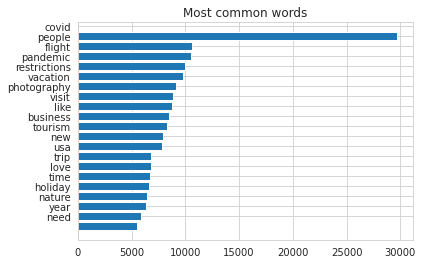

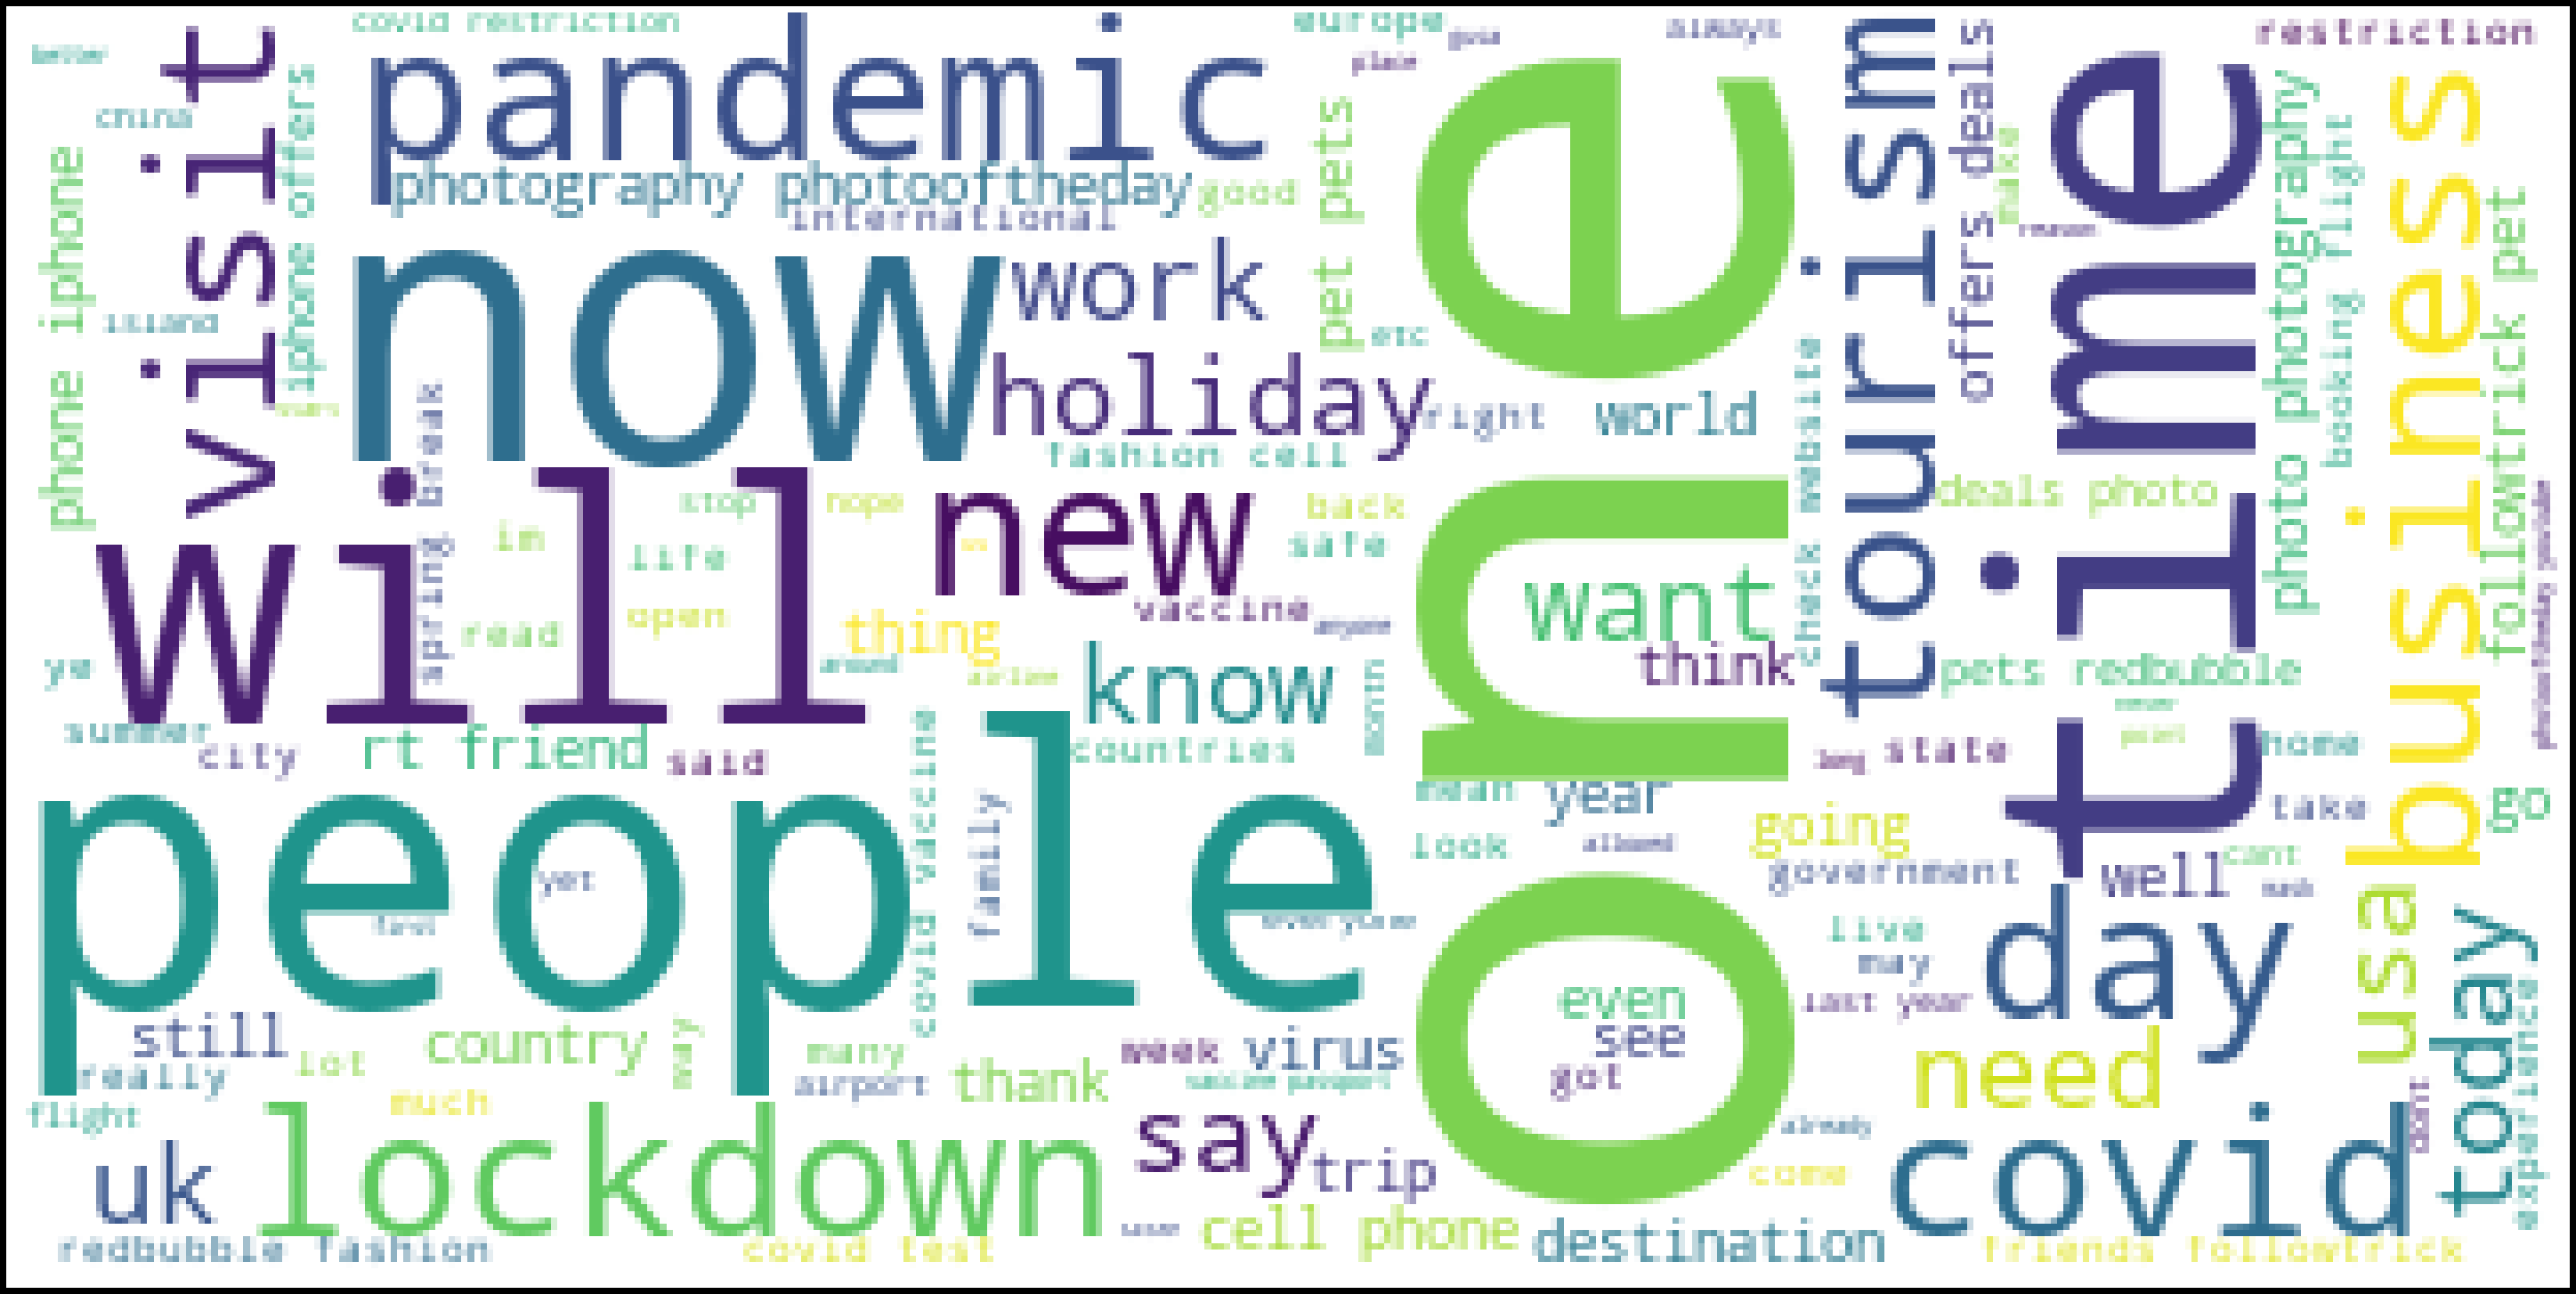

TOPICS FOUND USING NMF
Topic 0:
covid vaccin test certif passport summer case plan need allow
Topic 1:
trip vacat natur photographi love beauti holiday adventur explor instagood
Topic 2:
flight book intern refund cancel hotel airlin ticket vacat airport
Topic 3:
friend photo photographi photooftheday pet iphon redbubbl dare cell followtrick
Topic 4:
pandem peopl restrict visit year like time vaccin busi want
Topic #0 with weights
[('covid', 16.82), ('vaccin', 3.58), ('test', 2.83), ('certif', 1.09), ('passport', 0.98), ('summer', 0.9), ('case', 0.87), ('plan', 0.81), ('need', 0.71), ('allow', 0.65), ('requir', 0.64), ('europ', 0.59), ('updat', 0.57), ('neg', 0.56), ('news', 0.54), ('hawaii', 0.52), ('variant', 0.52), ('health', 0.52), ('safe', 0.45), ('posit', 0.45), ('pass', 0.45), ('spread', 0.44), ('break', 0.43), ('risk', 0.43), ('quarantin', 0.43), ('rule', 0.42), ('spring', 0.42), ('intern', 0.42), ('airport', 0.41), ('propos', 0.4)]
Topic #1 with weights
[('trip', 6.82), ('vacat

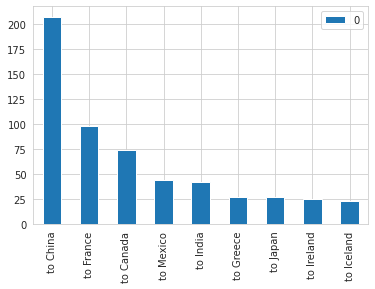

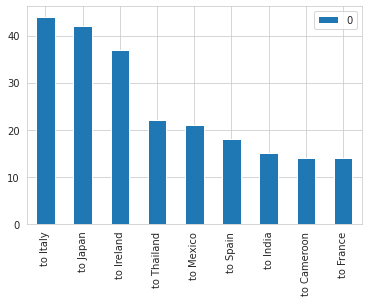

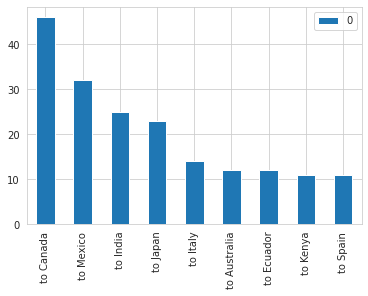

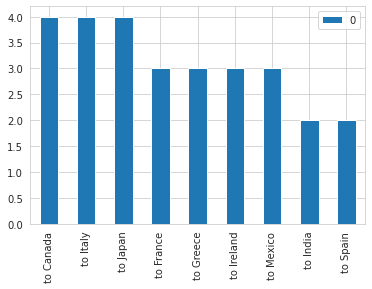

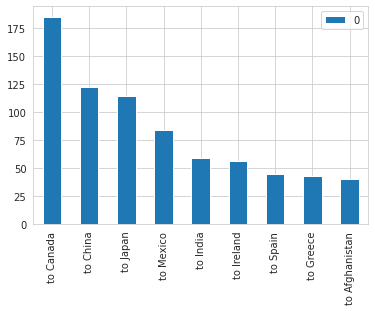

In [13]:
# reading the data
path = "/content/gdrive/MyDrive/data/" # path where we store the data

files = [path + f for f in listdir(path) if isfile(join(path, f))]
df = dataframe_from_mult_files(files)

#df = dataframe_from_file("stream_tweets_Week4_181k.csv") # put the path corresponding to the file
#df = pd.read_csv('results/Topic 0_4.csv')

col = "text" # the column where tweets are sotored
col_processed = col + "_processed" # we store in this column prcessed text
print(1)
# Cleaning the data
df = cleanData(df, col)
print(2)
# data processed (lemmatize_stemming)
df_processed = df.copy()
df_processed[col_processed] = df_processed[col].apply(preprocess)
print(3)
# If true save all results in results folder
save = True
# Visualise the most common words
wordBarGraphFunction(df, col, save)
wordcloud_data(df, col, save)

# paramerters
ntopic = 5 # number of topics
no_features = 1000
no_top_words = 10

ntweets = 20
model = ["NMF"]


if "BERT" in model:
    method = "LDA_BERT"
    tweets = df_processed.iloc[:ntweets,: ]
    samp_size = len(tweets)

    ##create pandas data frame with all abstracts, use as input corpus
    rws = tweets[col]
    sentences, token_lists, idx_in = preprocess_bert(rws, samp_size=samp_size)

    # Define the topic model object
    tm = Topic_Model(k = ntopic, method = method)

    # Fit the topic model by chosen method
    tm.fit(sentences, token_lists)

    # Evaluate using metrics
    print('Coherence:', get_coherence(tm, token_lists, 'c_v'))
    print('Silhouette Score:', get_silhouette(tm))
    save_topics(ntopic, tweets, tm.cluster_model.labels_,samp_size,save)

    # visualize and save img
    visualize(tm)
    for i in range(tm.k):
        get_wordcloud(tm, token_lists, i)
            
if "NMF" in model:
    print("TOPICS FOUND USING NMF")
    Nmf_model, Nmf_model_fitted, tfidf_feature_names, tfidf = nmf = NMF_model(df_processed, col_processed, no_features)
    display_topics(save,Nmf_model_fitted, tfidf_feature_names, no_top_words)
    clusters = get_clusters(Nmf_model_fitted, tfidf,save)
    get_topics(df, clusters,ntopic, save)
    nmf_weights = Nmf_model.components_
    topics = get_topics_terms_weights(nmf_weights, tfidf_feature_names)
    print_topics_udf(topics, total_topics=ntopic, num_terms=30, display_weights=True)
    topics_display_list = get_topics_udf(topics, total_topics=2, num_terms=30)
    

if "LDA" in model:
    print("TOPICS FOUND USING LDA")
    Lda_model, Lda_model_fitted, tf_feature_names, tf, tf_vectorizer = LDA_model(df_processed, col_processed, no_features)
    topic_of_tweets = np.argmax(Lda_model_fitted.transform(tf), axis=1)
    display_topics(save,Lda_model_fitted, tf_feature_names, no_top_words)
    clusters = get_clusters(Lda_model_fitted, tf,save)
    get_topics(df, clusters,ntopic, save)
    pyLDAvis.sklearn.prepare(Lda_model_fitted, tf, tf_vectorizer)

    
# the analysis of destinations is done if we saved our results before
if save:
    #destinations :
    ##Load the csv file containing the different countries :
    countries = pd.read_csv("/content/gdrive/MyDrive/topic_modeling/destinations/data_csv.csv")# put the path corresponding to the file
    
    ## TO + Country gives more insights about the destinations 
    countries['Name'] = 'to ' + countries['Name'] 
    
    ##Each element of Lists_Topics is a dataframe containing a given topic
    Lists_Topics = load_tweets(ntopic,"/content/gdrive/MyDrive/results/")
    
    ##List of lists : each element(list) contains tuples (a,b) where a is the number of occurences of b ( to + country) in the topic corresponding to the elemnt
    destinations = find_destinations(Lists_Topics,countries)
    
    ##Plotting the top destinations in each topic
    plot_destinations(destinations)
